In [1]:
#Preprocessing
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
import math
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from libreria import *
from clase import *

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostRegressor

#Pickle
import pickle

#Graphics
from plotly.offline import plot,iplot

# Cargar datos y pipeline

In [2]:
df = pd.read_csv('Datos_prueba.csv')

In [3]:
pipeline_clean = pickle.load(open('pipeline_train.pkl', 'rb'))

In [4]:
pipeline_clean.fit(df)

Pipeline(steps=[('Headers', <clase.Headers object at 0x0000013ECAE42F48>),
                ('Engineering',
                 <clase.Engineering object at 0x0000013ECAE584C8>),
                ('Drop', <clase.Drop_columns object at 0x0000013ECAE58588>),
                ('Join', <clase.Get_popularity object at 0x0000013ECAE58648>),
                ('Enconde',
                 <clase.Encode_popularity object at 0x0000013EC234CE48>)])

In [5]:
df2 = pipeline_clean.transform(df)

In [6]:
df2

,c_acousticness,c_danceability,c_duration_ms,c_energy,v_explicit,c_instrumentalness,c_liveness,v_popularity,c_speechiness,c_tempo,v_num_artists,x0_10,x0_20,x0_30,x0_40,x0_50,x0_60,x0_70,x0_80,x0_90
0,0.171000,0.435,187693,0.428,0,0.000708,0.1490,54,0.0268,95.534,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000174,0.286,312120,0.728,0,0.836000,0.1330,65,0.0616,171.441,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.003670,0.457,148027,0.955,0,0.000005,0.3240,39,0.1310,170.192,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.995000,0.398,196689,0.174,0,0.930000,0.1180,0,0.2090,67.326,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.904000,0.516,171293,0.118,0,0.000001,0.1090,53,0.0331,91.693,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.549000,0.798,145267,0.233,0,0.000000,0.1760,26,0.0670,115.907,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.004970,0.483,350360,0.978,0,0.125000,0.0782,42,0.0882,161.764,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.986000,0.500,173128,0.195,0,0.921000,0.1340,0,0.0487,70.616,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.931000,0.477,208589,0.348,0,0.949000,0.1100,56,0.0335,117.940,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Parametros para gridsearch y entrenamiento

In [7]:
%%time
#Ridge regresion grid params
param_grid_ridge = list(np.arange(0, 10, 0.1))

#Lasso regresion grid params
param_grid_lasso = list(np.arange(0, 10, 0.1))

#Random Forest grid params
param_grid_rf = {
    'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 300]
}

#Gradient boosting params
param_grid_gb = {
#    'loss': ['ls','huber'],
    'max_depth': [5],
#     'max_features': [2, 3],
     'min_samples_leaf': [3],
     'min_samples_split': [12],
    'n_estimators': [500]
}

#Support vector machine params
param_grid_svr = {'kernel': ('linear','rbf') #, 'rbf','poly'
#                   'C':[1.5, 10],'gamma': [1e-7, 1e-4],
#                   'epsilon':[0.1,0.2,0.5,0.3]
                 }

param_grid_ab = {
 'n_estimators': [50],
 'learning_rate' : [0.01],
 'loss' : ['exponential']
 }

resumen, dict_models = modeling(df2,'v_popularity',[1,1,1,1,0,1],7,param_grid_ridge,param_grid_lasso,param_grid_rf,param_grid_gb,param_grid_svr,param_grid_ab)

MODELO: REGRESION RIDGE 

Fitting 7 folds for each of 100 candidates, totalling 700 fits
{'alpha': 1.6}


MODELO: REGRESION LASSO 

Fitting 7 folds for each of 100 candidates, totalling 700 fits


C:\Users\joker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\joker\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.



{'alpha': 0.0}


C:\Users\joker\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 13541.454906039164, tolerance: 13.073111632857673



MODELO: RANDOM FOREST 

Fitting 7 folds for each of 2 candidates, totalling 14 fits


C:\Users\joker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'bootstrap': True, 'n_estimators': 300}


MODELO: GRADIENT BOOSTING 

Fitting 7 folds for each of 1 candidates, totalling 7 fits


C:\Users\joker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 500}


MODELO: ADABOOST 

Fitting 7 folds for each of 1 candidates, totalling 7 fits
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}


Wall time: 38min 50s


In [12]:
resumen

,Model,R2_train,R2_test,R2adj_train,R2adj_test,MSE train,MSE test,MAE train,MAE test
0,Ridge,0.792835,0.787123,0.792805,0.787030,0.207186,0.212813,0.312466,0.316603
1,Lasso,0.792835,0.787123,0.792805,0.787030,0.207186,0.212813,0.312460,0.316597
2,Random Forest,0.970272,0.796431,0.970267,0.796343,14.221458,97.344085,2.505977,6.712999
3,Gradient Boosting,0.819151,0.796270,0.819125,0.796181,86.514662,97.421203,6.366011,6.764235
4,Adaboost,0.389891,0.390233,0.389802,0.389967,291.864961,291.583403,13.343110,13.349880


### Performance mejor modelo

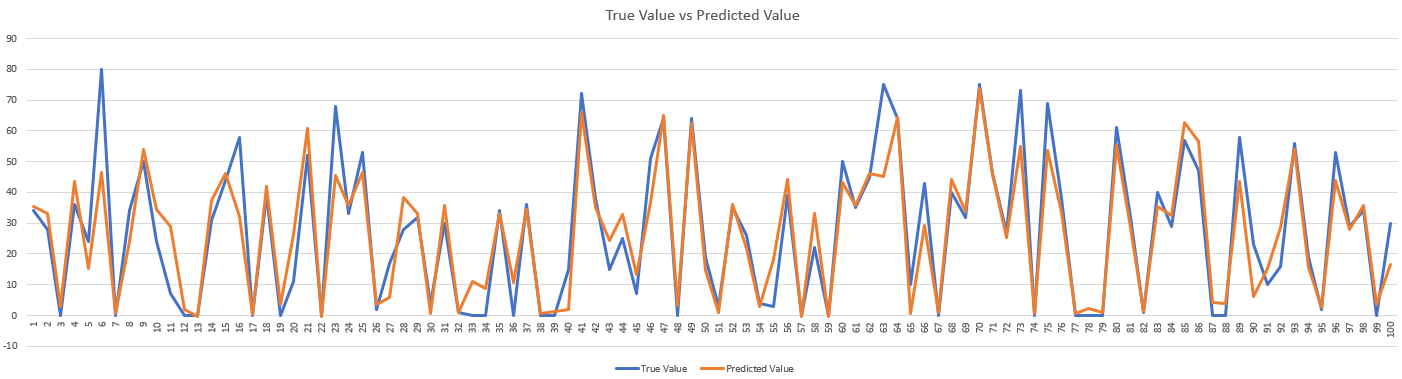

In [11]:
df = df2.copy()
tgt = 'v_popularity'

X = df.loc[:,df.columns != tgt]
y = df.loc[:,df.columns == tgt]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X_train_sc,X_test_sc,y_train_sc,y_test_sc = train_test_split(X,y,test_size=0.25, random_state=0)

for model in ['RF','GB','AB','RIDGE','LASSO']:
    
    true_df = y_test
    if model == 'RIDGE' or model == 'LASSO':
        X_train = X_train_sc.copy()
        X_test = X_test_sc.copy()
        y_train = y_train_sc.copy()
        y_test = y_test_sc.copy()
        true_df = pd.DataFrame(y_test,columns=['v_popularity'])
        
    df_aux_test=pd.DataFrame()
    
    
    pred = dict_models[model].predict(X_test)
    
    df_aux_test["True Value"] = true_df[tgt]
    df_aux_test["Predicted Value"] = pred
        
    #df_aux_test.to_csv(model + '.csv',index=False)


In [13]:
#Intervalos de prediccion
df = df2.copy()
tgt = 'v_popularity'

X = df.loc[:,df.columns != tgt]
y = df.loc[:,df.columns == tgt]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

lower_alpha = 0.1 
upper_alpha = 0.9

lower_model = GradientBoostingRegressor(loss = "quantile",                    
                                        alpha = lower_alpha)  
upper_model = GradientBoostingRegressor(loss = "quantile", 
                                        alpha = upper_alpha)

lower_model.fit(X_train, y_train) 
upper_model.fit(X_train, y_train)

df_aux_test["lower_pred"]=lower_model.predict(X_test)
df_aux_test["upper_pred"]=upper_model.predict(X_test)

df_aux_test.to_csv('intervalos.csv',index=False)

C:\Users\joker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\joker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Intervalo de confianza (Implementacion gradient boosting)

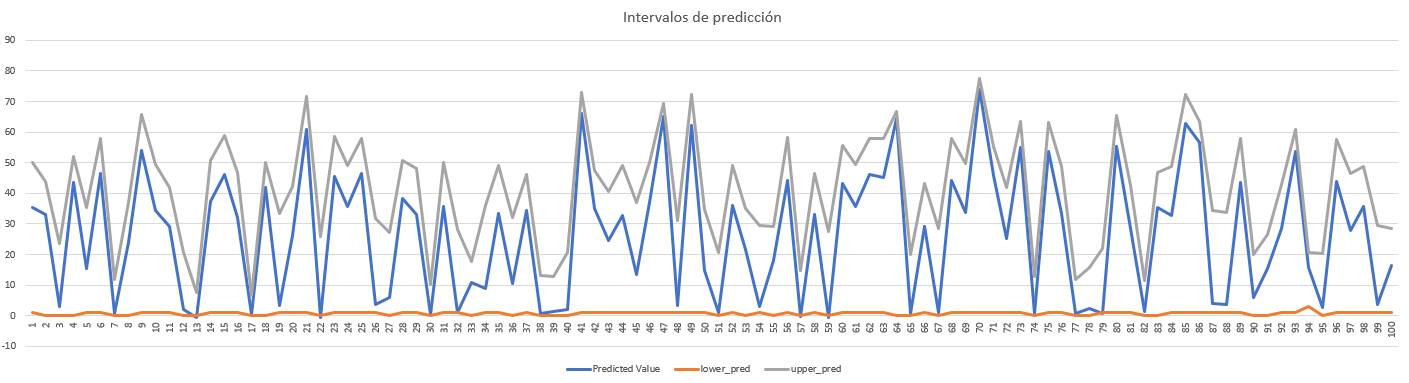

In [14]:
#save models
for model in ['RF','GB','AB','RIDGE','LASSO']:
    gb_final = dict_models[model]
    filename = model + '.pkl'
    pickle.dump(gb_final, open(filename, 'wb'))

In [17]:
loaded_model = pickle.load(open('RF.pkl', 'rb'))

In [18]:
loaded_model

RandomForestRegressor(n_estimators=300)

In [20]:
loaded_model.predict(X_test)

array([37.20527778, 31.26666667,  2.78333333, ...,  2.49666667,
       13.35666667,  5.82333333])